# Lab 8.1 SVD with Monthly Precipitation

Derived from svd_tutorial.m (data decomposition tutorial using SVD in MATLAB)

by Brian Henn, UW, October 2013. Updated by Jessica Lundquist, October 2014. Converted to python by Steven Pestana, November 2019

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

# we'll use scipy's IO library and datetime to read .mat files
import scipy.io as sio 
import datetime as dt

# SVD function from scipy
from scipy.linalg import svd

---
#### Read in PRISM file

In [2]:
data = sio.loadmat('../data/PRISM_4km_1982-2012.mat')

In [3]:
# Inspect the dictionary keys
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Zs', 'dates', 'xs', 'ys', 'Xs', 'Ys', 'ppt_mean', 'ppt', 'map_index', 'ny', 'nx', 'nm', 'n', 'ppt_stdev'])


Unpack the mat file into numpy arrays, format dates to python datetimes following the method outlined [here](https://sociograph.blogspot.com/2011/04/how-to-avoid-gotcha-when-converting.html).

In [4]:
# convert matlab format dates to python datetimes
datenums = data['dates'][:,0]
dates = [dt.datetime.fromordinal(int(d)) + dt.timedelta(days=int(d)%1) - dt.timedelta(days = 366) for d in datenums]

# Unpack the rest of the data
Zs = data['Zs'] #elevation
xs = data['xs'] # x coordinate
ys = data['ys'] # y coordinate
Xs = data['Xs'] # longitude on a grid
Ys = data['Ys'] # latitude on a grid
ppt_mean = data['ppt_mean']
ppt = data['ppt']
map_index = data['map_index'][:,0] - 1 # map indices need to be shifted by -1 for numpy arrays
ny = data['ny'][0][0] #size in the y dimension
nx = data['nx'][0][0] # size in the x dimension
nm = data['nm'][0][0]
n = data['n'][0][0]
ppt_stdev = data['ppt_stdev']

**ppt_mean**: gridded array of average monthly rainfall (mm) (lat. x lon.)

**ppt**: gridded array of monthly rainfall anomaly (mm) (lat. x lon.) (ppt has a mean of 0)

**ppt_stdev**:  gridded array of the standard deviation in monthly rainfall by location (mm)

**map_index**: list of indices for rearranging 1D array into gridded data


I'm also going to define this function, which will help us use the "map_index" to correctly shape our data into 2D maps

In [5]:
def make_map(X, n, nx, ny):
    # create an empty np array full of NaN values, that's the correct length for our 2D data
    a = np.full(n, np.nan)
    # use the map_index to arrange data values from this selected month into array "a"
    a[map_index] = X
    # reshape "a" into a 2D array of the correct shape
    b = a.reshape([nx, ny]).T
    # return our 2D map
    return b

---
#### Plot Elevation Data

Text(0, 0.5, 'latitude')

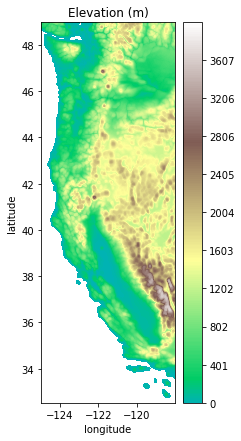

In [6]:
plt.figure(figsize=(3,7))
plt.contourf(Xs,Ys,Zs, levels=np.linspace(0,4000,500), cmap='terrain', vmin=-1000)
plt.colorbar()
plt.title('Elevation (m)')
plt.xlabel('longitude')
plt.ylabel('latitude')

---
#### Plot Mean Precip. Data

Text(0, 0.5, 'latitude')

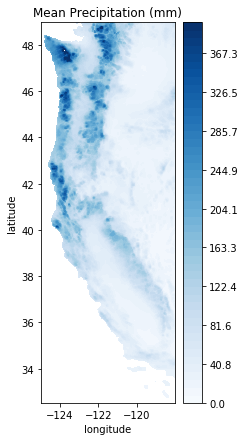

In [7]:
plt.figure(figsize=(3,7))
plt.contourf(Xs,Ys,ppt_mean, levels=np.linspace(0,400), cmap='Blues')
plt.colorbar()
plt.title('Mean Precipitation (mm)');
plt.xlabel('longitude')
plt.ylabel('latitude')

---
#### Plot some monthly precipitation anomalies

In [8]:
month = 0  #this index tells us which month in our timeseries we want to plot
print(dates[0]) # print our first date (this data is on a monthly timestep, so it will be our first month)

1981-10-01 00:00:00


This first month in our dataset is October 1981

Plot precipitation anomaly for this month (we are using our "make_map" function below to rearrange the precip data into the correct 2D shape)

Text(0, 0.5, 'latitude')

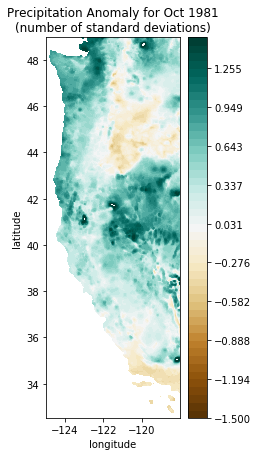

In [9]:
plt.figure(figsize=(3,7))
plt.contourf(Xs, Ys, make_map(ppt[:,month], n, nx, ny), levels=np.linspace(-1.5,1.5), cmap='BrBG')
plt.colorbar()
plt.title('Precipitation Anomaly for Oct 1981\n(number of standard deviations)');
plt.xlabel('longitude')
plt.ylabel('latitude')

---
#### **Decompose the entire dataset using SVD**

In [10]:
U, S, V = svd(ppt,full_matrices=False)

Look at the shape of each the outputs

In [11]:
U.shape, S.shape, V.shape

((46718, 372), (372,), (372, 372))

**Take a look at the EOFs (U) and PCs (V)**

Text(0, 0.5, 'weight')

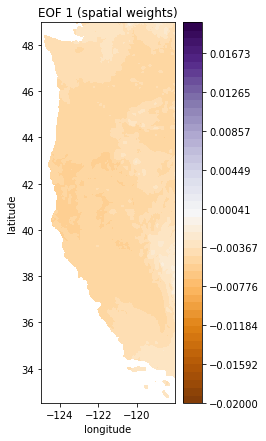

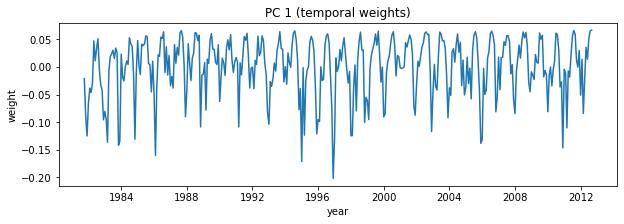

In [12]:
# first index for both U and V
i = 0

# plot first EOF (U)
plt.figure(figsize=(3,7))
plt.contourf(Xs, Ys, make_map(U[:,i], n, nx, ny), levels=np.linspace(-0.02, 0.02), cmap='PuOr')
plt.colorbar()
plt.title('EOF 1 (spatial weights)');
plt.xlabel('longitude')
plt.ylabel('latitude')

# Plot first PC (V)
plt.figure(figsize=(10,3))
plt.plot(dates,V[i,:]);
plt.title('PC 1 (temporal weights)');
plt.xlabel('year')
plt.ylabel('weight')

Note that you can equivalently plot these each with a -1 multiplier (sometimes that makes it easier to interpret things)

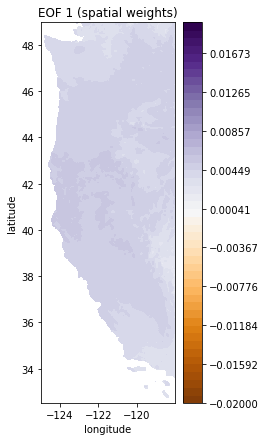

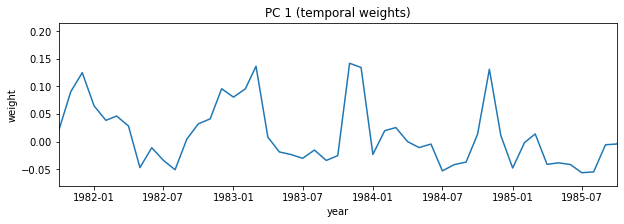

In [13]:
plt.figure(figsize=(3,7))
plt.contourf(Xs,Ys,-1*make_map(U[:,i], n, nx, ny), levels=np.linspace(-0.02, 0.02), cmap='PuOr') # with -1 multiplier
plt.colorbar()
plt.title('EOF 1 (spatial weights)');
plt.xlabel('longitude')
plt.ylabel('latitude')

# Plot first PC
# Note that I'm also going to zoom here so that it's easier to see how things change by month
# over just a few years
i=0
plt.figure(figsize=(10,3))
plt.plot(dates,-1*V[i,:])  # with -1 multiplier
plt.title('PC 1 (temporal weights)')
plt.xlabel('year')
plt.ylabel('weight')
# setting the x limits to the 0th and 48th dates in the dataset
plt.xlim((dates[0], dates[48]));

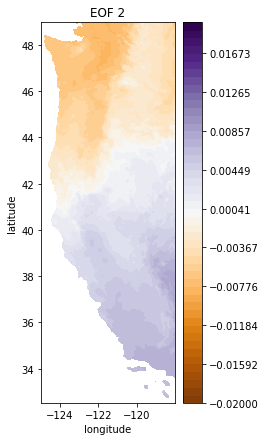

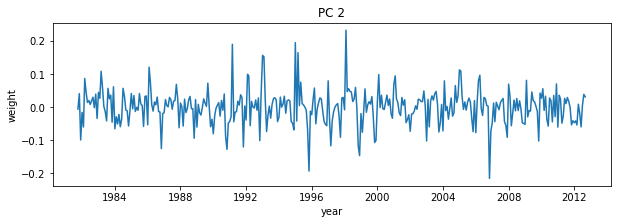

In [14]:
i = 1
# plot second EOF
plt.figure(figsize=(3,7))
plt.contourf(Xs,Ys,-1*make_map(U[:,i], n, nx, ny), levels=np.linspace(-0.02, 0.02), cmap='PuOr')  # with -1 multiplier
plt.colorbar()
plt.title('EOF 2');
plt.xlabel('longitude')
plt.ylabel('latitude')

# Plot second PC
plt.figure(figsize=(10,3))
plt.plot(dates,-1*V[i,:])   # with -1 multiplier
plt.title('PC 2')
plt.xlabel('year')
plt.ylabel('weight');

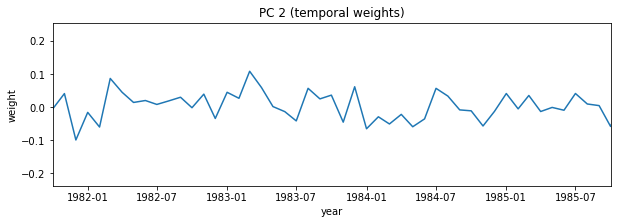

In [15]:
# Again, try zooming in to some specific dates on the PC
i = 1
plt.figure(figsize=(10,3))
plt.plot(dates,-1*V[i,:])  # with -1 multiplier
plt.title('PC 2 (temporal weights)')
plt.xlabel('year')
plt.ylabel('weight')

plt.xlim((dates[0], dates[48]));

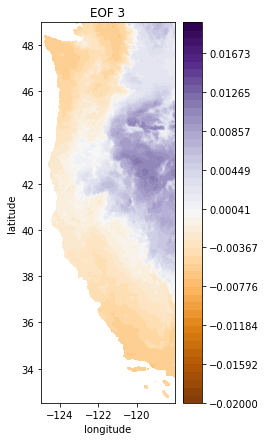

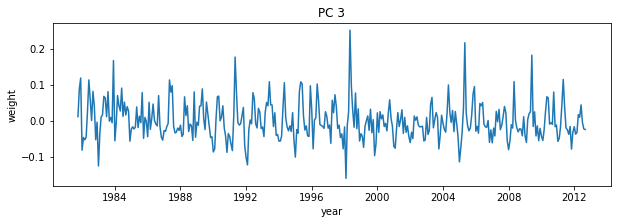

In [16]:
i = 2

# plot third EOF
plt.figure(figsize=(3,7))
plt.contourf(Xs,Ys,-1*make_map(U[:,i], n, nx, ny), levels=np.linspace(-0.02, 0.02), cmap='PuOr')  # with -1 multiplier
plt.colorbar()
plt.title('EOF 3');
plt.xlabel('longitude')
plt.ylabel('latitude')

# Plot third PC
plt.figure(figsize=(10,3))
plt.plot(dates,-1*V[i,:])  # with -1 multiplier
plt.title('PC 3')
plt.xlabel('year')
plt.ylabel('weight');

---
#### SVD Variance Explained
Recall that the values in matrix S describes the variance explained by each pattern.

- What fraction of the whole dataset is described by the first 10 patterns?

Compute the fraction of total variance explained by dividing by the sum of all variance

In [17]:
# SVD Variance Explained, divide S values by the sum of all S
var_exp = S / np.sum(S)

Plot our fraction of variance explained versus EOF number

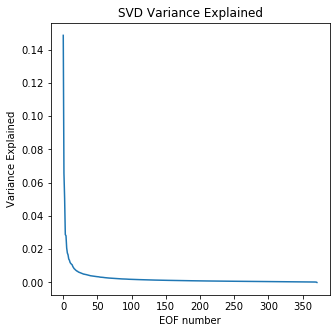

In [18]:
plt.figure(figsize=(5,5))
plt.plot(var_exp)
plt.xlabel('EOF number')
plt.ylabel('Variance Explained')
plt.title('SVD Variance Explained');

Set smaller ranges of axes limits to zoom in to the first 10 EOFs

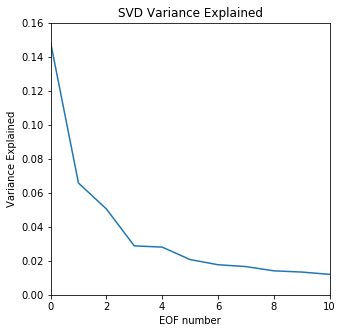

In [19]:
plt.figure(figsize=(5,5))
plt.plot(var_exp)
plt.xlabel('EOF number')
plt.ylabel('Variance Explained')
plt.title('SVD Variance Explained')
plt.ylim([0,0.16])
plt.xlim([0,10]);

- What fraction of the whole dataset is described by the first 10 patterns?

In [20]:
# the first 10:
print(var_exp[0:10])

# sum of the first 10
print('Percent of overall variance expplained by the top 10 patterns = {}%'.format( np.round( 100*np.sum(var_exp[0:10]),1)))

[0.1486109  0.06578349 0.05054685 0.0288071  0.02807555 0.02074685
 0.01770611 0.01661285 0.01411301 0.01339134]
Percent of overall variance expplained by the top 10 patterns = 40.4%


---
#### Plot 10 leading EOFs
Note that because they are all plotted in close proximity, we will not put on all the axes labels.
In general, please always remember axes labels.

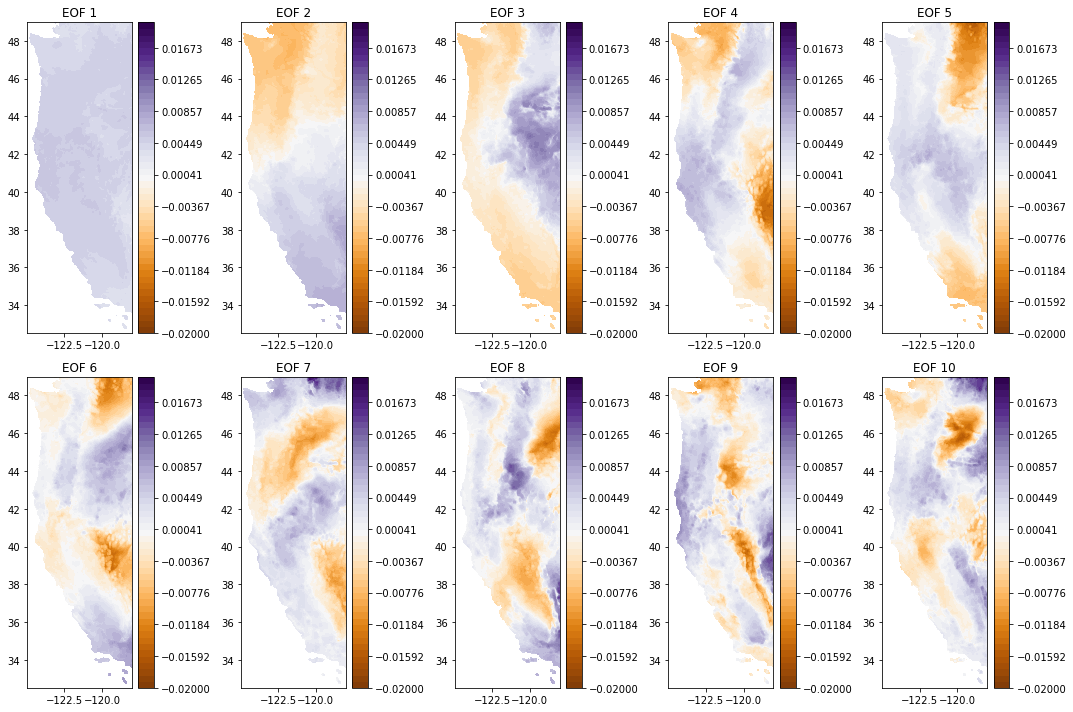

In [21]:
f, ax = plt.subplots(2,5,figsize=(15,10), tight_layout=True)
i = 0
for row in range(2):
    for column in range(5):    
      
        cf = ax[row,column].contourf(Xs,Ys,-1*make_map(U[:,i], n, nx, ny), levels=np.linspace(-0.02, 0.02), cmap='PuOr') # with -1 multiplier
        cbar = plt.colorbar(cf, ax=ax[row,column])
        ax[row,column].set_title('EOF {}'.format(i+1))
        i+=1

plt.tight_layout()

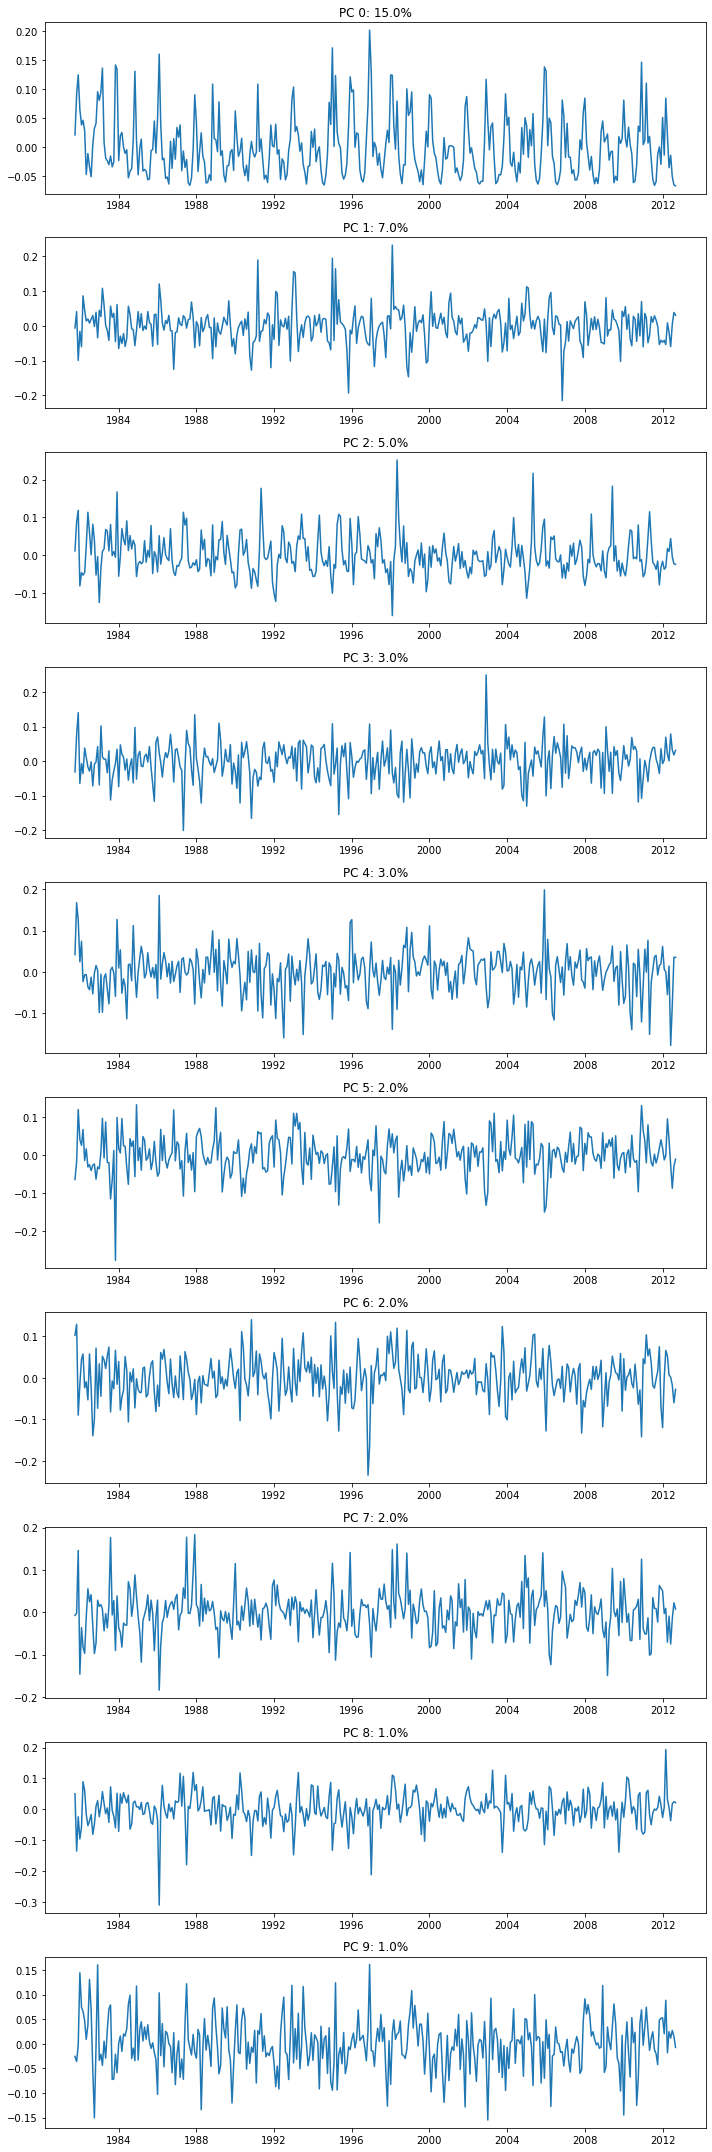

In [22]:
# Plot the 10 leading PCs
f, ax = plt.subplots(10,1,figsize=(10,30))
for i in range(10):
    ax[i].plot(dates,-1*V[i,:]); # with -1 multiplier
    ax[i].set_title('PC {}: {}%'.format(i,np.round(100*var_exp[i]),2));
plt.tight_layout()

---

#### Reconstructing Original Data

Reconstruct and plot October 1981 data with only 10 EOFs/PCs. 

We can reconstruct much of the original data using only the first several patterns. This requires much less information than the original data itself.

See documentation and examples [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html).

In [23]:
# Select the first 10 to reconstruct the precip data
i=9
ppt_reconstructed = np.dot(U[:,:i] * S[:i], V[:i,:])

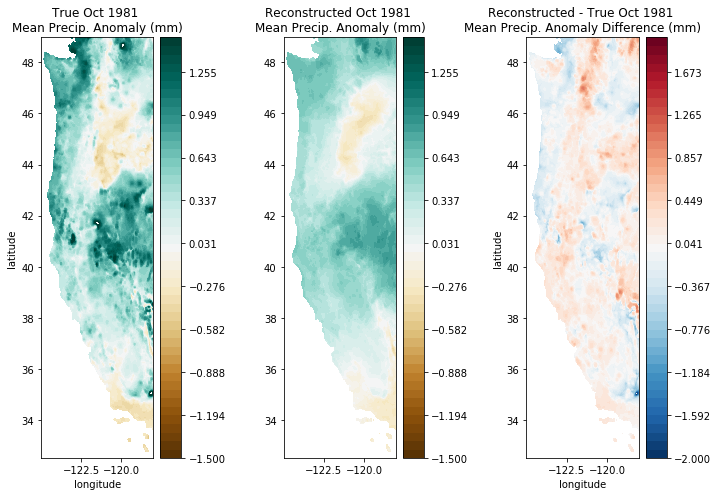

In [24]:
fig, ax = plt.subplots(1,3,figsize=(10,7))

month = 0

# Plot the original precip data
cf = ax[0].contourf(Xs,Ys,make_map(ppt[:,month], n, nx, ny), levels=np.linspace(-1.5,1.5), cmap='BrBG')
cbar = plt.colorbar(cf, ax=ax[0])
ax[0].set_title('True Oct 1981 \nMean Precip. Anomaly (mm)');
ax[0].set_xlabel('longitude')
ax[0].set_ylabel('latitude')

# Plot the reconstructed precip data
cf = ax[1].contourf(Xs,Ys,make_map(ppt_reconstructed[:,month], n, nx, ny), levels=np.linspace(-1.5,1.5), cmap='BrBG')
cbar = plt.colorbar(cf, ax=ax[1])
ax[1].set_title('Reconstructed Oct 1981 \nMean Precip. Anomaly (mm)');
plt.xlabel('longitude')
plt.ylabel('latitude')

# Plot the difference between the original and reconstructed data
difference = make_map(ppt_reconstructed[:,month], n, nx, ny) - make_map(ppt[:,month], n, nx, ny)
cf = ax[2].contourf(Xs,Ys,difference,levels=np.linspace(-2,2),cmap='RdBu_r')
cbar = plt.colorbar(cf, ax=ax[2])
ax[2].set_title('Reconstructed - True Oct 1981 \nMean Precip. Anomaly Difference (mm)');
plt.xlabel('longitude')
plt.ylabel('latitude')

plt.tight_layout()

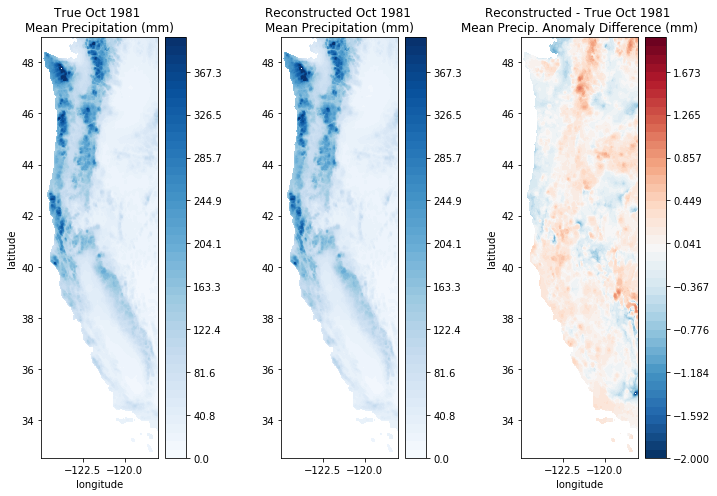

In [25]:
fig, ax = plt.subplots(1,3,figsize=(10,7))

month = 0

# Plot the original precip data
cf = ax[0].contourf(Xs,Ys,ppt_mean + make_map(ppt[:,month], n, nx, ny), levels=np.linspace(0,400), cmap='Blues')
cbar = plt.colorbar(cf, ax=ax[0])
ax[0].set_title('True Oct 1981 \nMean Precipitation (mm)');
ax[0].set_xlabel('longitude')
ax[0].set_ylabel('latitude')

# Plot the reconstructed precip data
cf = ax[1].contourf(Xs,Ys,ppt_mean + make_map(ppt_reconstructed[:,month], n, nx, ny), levels=np.linspace(0,400), cmap='Blues')
cbar = plt.colorbar(cf, ax=ax[1])
ax[1].set_title('Reconstructed Oct 1981 \nMean Precipitation (mm)');
plt.xlabel('longitude')
plt.ylabel('latitude')

# Plot the difference between the original and reconstructed data
difference = make_map(ppt_reconstructed[:,month], n, nx, ny) - make_map(ppt[:,month], n, nx, ny)
cf = ax[2].contourf(Xs,Ys,difference,levels=np.linspace(-2,2),cmap='RdBu_r')
cbar = plt.colorbar(cf, ax=ax[2])
ax[2].set_title('Reconstructed - True Oct 1981 \nMean Precip. Anomaly Difference (mm)');
plt.xlabel('longitude')
plt.ylabel('latitude')

plt.tight_layout()